# Evaluating the quality of the reads
FASTQ files are the standard format output used by modern sequencers. This section explains how to work with quality scores per base. That is to say, to check the error of each measure base in order to have an idea of how precise is the sequence obtain.

### Data formats explanations:
This is a small file (27 MB) and represents part of the sequenced data of a Yoruban female (NA18489). If you refer to the 1,000 Genomes Project, you will see that the vast majority of FASTQ files are much bigger (up to two orders of magnitude bigger).

    @SRR003258.1 30443AAXX:1:1:1053:1999 length=51 
    ACCCCCCCCCACCCCCCCCCCCCCCCCCCCCCCCCCCACACACACCAACAC
    +
    =IIIIIIIII5IIIIIII>IIII+GIIIIIIIIIIIIII(IIIII01&III
    
Line 1 starts with @, followed by a sequence identifier and a description string. The description string will vary from a sequencer or a database source, but will normally be amenable to automated parsing. The second line has the sequence DNA, which is just like a FASTA file. The third line is a +, sometimes followed by the description line on the first line. The fourth line contains quality values for each base that's read on line two. Each letter encodes a Phred quality score, which assigns a probability of error to each read.

### Getting the data

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from bioinformatics_guide.utils.paths import data_dir
data_dir()

PosixPath('/home/alejandrodf1/Documents/bioinformatics/bioinformatics_guide/data')

In [1]:
# getting the data
#!wget -nd ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz

--2022-10-09 21:11:46--  ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz
           => ‘SRR003265.filt.fastq.gz’
Resolving ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)... 193.62.193.140
Connecting to ftp.1000genomes.ebi.ac.uk (ftp.1000genomes.ebi.ac.uk)|193.62.193.140|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /vol1/ftp/phase3/data/NA18489/sequence_read ... done.
==> SIZE SRR003265.filt.fastq.gz ... 28919712
==> PASV ... done.    ==> RETR SRR003265.filt.fastq.gz ... done.
Length: 28919712 (28M) (unauthoritative)

SRR003265.filt.fast 100%[===================>]  27.58M  4.24MB/s    in 19s     

2022-10-09 21:12:07 (1.45 MB/s) - ‘SRR003265.filt.fastq.gz’ saved [28919712]



In [4]:
#unzip the file
import gzip
import shutil
with gzip.open('SRR003265.filt.fastq.gz', 'rb') as f_in:
    with open(data_dir('raw/SRR003265.filt.fastq'), 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

### Reading FASTQ files

In [5]:
#libraries
from collections import defaultdict
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO

In [11]:
recs = SeqIO.parse(data_dir('raw/SRR003265.filt.fastq'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(f'Quality score per letter: {rec.letter_annotations}')

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
Quality score per letter: {'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


## Phred Quality Scores
NOTE: NEVER PUT IN LIST RECS
![](/home/alejandrodf1/Documents/bioinformatics/bioinformatics_guide/references/phred_quality_socre.png)

## Distribution of nucleotide reads
N - uncalled base

In [12]:
#the following do a count of each letter in a rec
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1 
tot = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d' % (letter, 100. * count/tot, count))

G: 20.68 5359329
A: 28.60 7411928
T: 29.58 7666885
C: 21.00 5444044
N: 0.14 37289


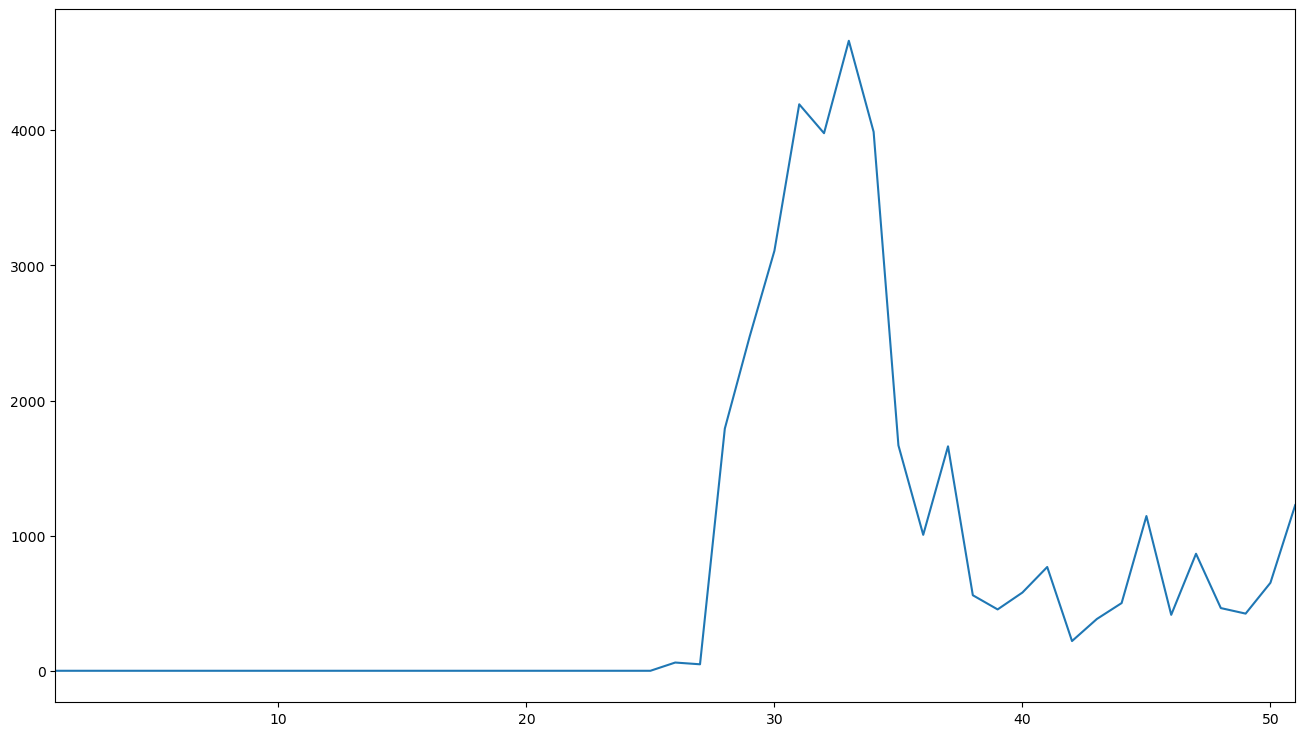

In [14]:
recs = SeqIO.parse(data_dir('raw/SRR003265.filt.fastq'), 'fastq')
n_cnt = defaultdict(int)
for rec in recs:
    for i, letter in enumerate(rec.seq):
        pos = i + 1
        if letter == 'N':
            n_cnt[pos] += 1

seq_len = max(n_cnt.keys())
position = range(1, seq_len + 1)

fig, ax = plt.subplots(figsize = (16,9))
ax.plot(position, [n_cnt[x] for x in position])
ax.set_xlim(1, seq_len)
pass